Clustering: K-Means 
Dataset: Cities_r2.csv 
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques 
if necessary. 
Apply K-Means clustering algorithms (based on total_graduates) to find the group 
of customers.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Load the dataset
data = pd.read_csv('cities_r2.csv')

# Preview the dataset
data.head()


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [48]:
# Check for missing values
data.isnull().sum()
# Optionally, fill or drop missing values if necessary
data.dropna()


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,total_graduates_scaled,cluster
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,-0.280994,1
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,-0.322787,1
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,-0.313206,1
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,-0.264455,1
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,-0.305679,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483,-0.200105,1
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106,0.244377,1
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718,-0.263678,1
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454,-0.204907,1


In [47]:
# Standardize the 'total_graduates' column
scaler = StandardScaler()
data['total_graduates_scaled'] = scaler.fit_transform(data[['total_graduates']])
data


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,total_graduates_scaled,cluster
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,-0.280994,1
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,-0.322787,1
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,-0.313206,1
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,-0.264455,1
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,-0.305679,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483,-0.200105,1
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106,0.244377,1
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718,-0.263678,1
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454,-0.204907,1


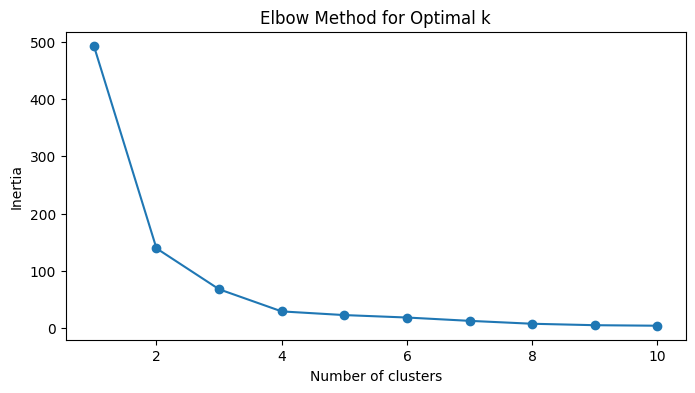

In [42]:
# Prepare the data for clustering (using the scaled version)
X = data[['total_graduates_scaled']]

# Elbow method to find the optimal number of clusters
inertia = [] #sum of squared distances from each point to its assigned cluster center
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


In [43]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)


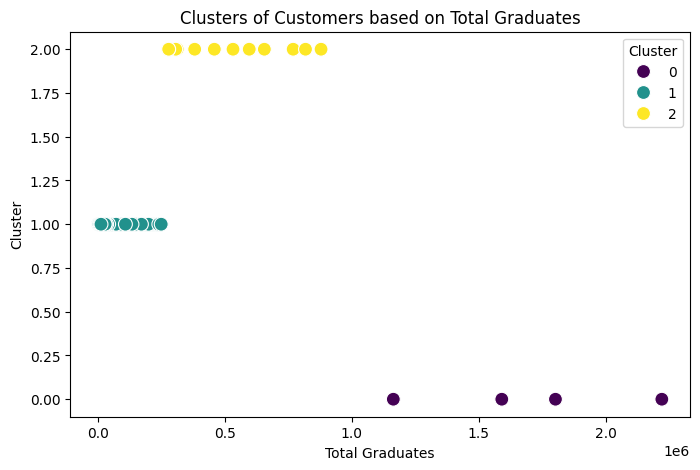

In [50]:
# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='total_graduates', y='cluster', hue='cluster', palette='viridis', s=100)
plt.title("Clusters of Customers based on Total Graduates")
plt.xlabel("Total Graduates")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()
